Original Data Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

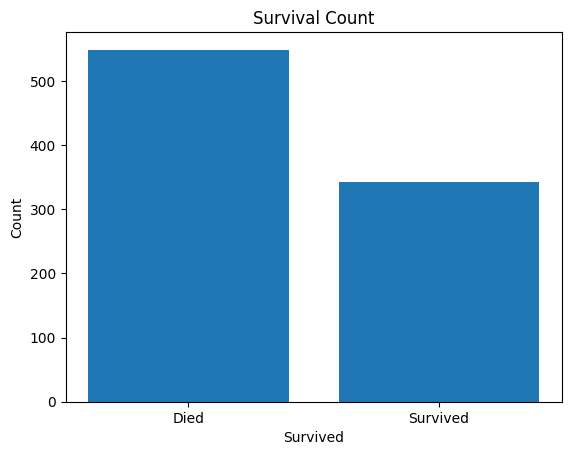

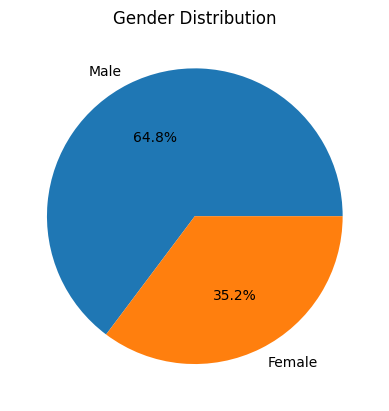

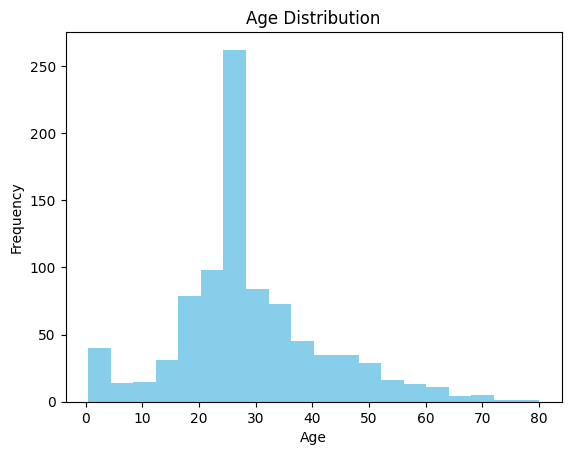

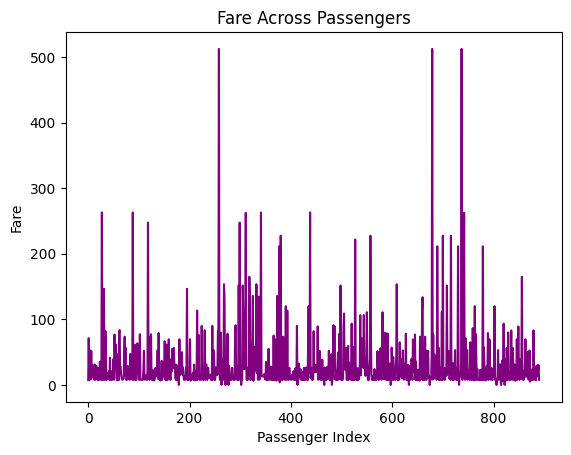

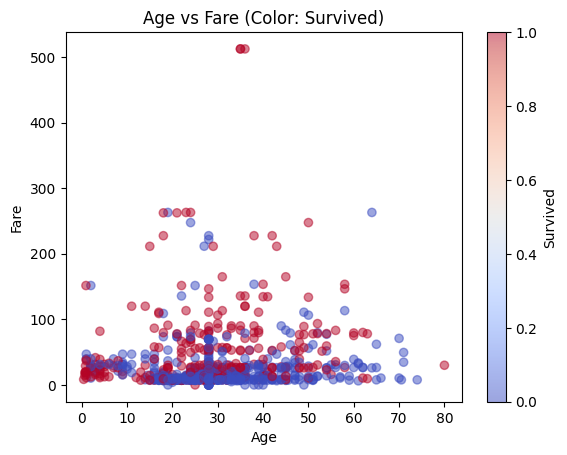

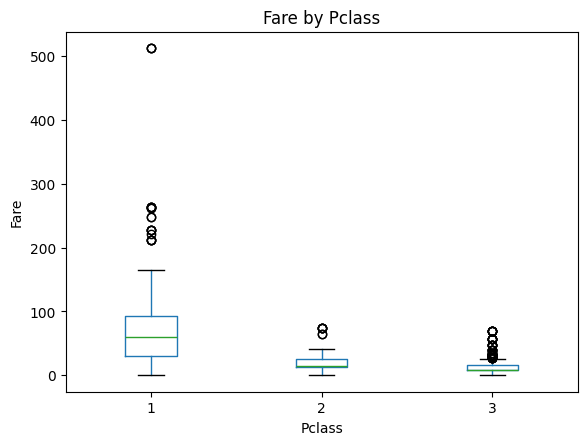

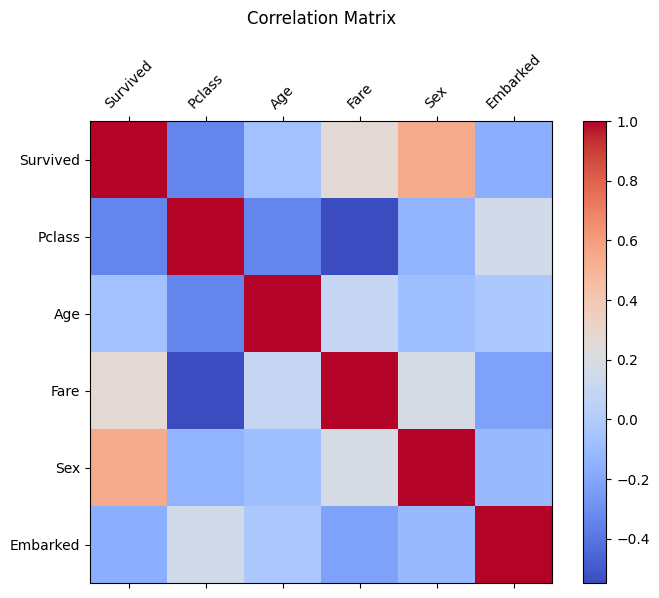

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. LOAD DATA
df = pd.read_csv("C:\\Users\\Hardika\\Downloads\\titanic.csv")

print("Original Data Shape:", df.shape)
print(df.head())

# 2. DATA CLEANING
# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Drop columns with too many missing values
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

# 3. DATA IMPUTATION & HANDLING MISSING DATA
# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop rows with any remaining missing values
df.dropna(inplace=True)

# 4. DATA ENCODING
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

embarked_map = {'C': 0, 'Q': 1, 'S': 2}
df['Embarked'] = df['Embarked'].map(embarked_map)

# 5. DATA TRANSFORMATION
# Create a new column: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch']

# 6. DATA NORMALIZATION
scaler = MinMaxScaler()
df['Fare_normalized'] = scaler.fit_transform(df[['Fare']])

# 7. DATA SCALING (Standardization)
standard_scaler = StandardScaler()
df['Age_scaled'] = standard_scaler.fit_transform(df[['Age']])

# 8. DATA REDUCTION (Dropping unnecessary columns)
df_reduced = df.drop(columns=['PassengerId'])

# 9. DATA INTEGRATION (Merging with sample dummy dataset)
# Simulate another dataset (e.g., passenger class descriptions)
class_info = pd.DataFrame({
    'Pclass': [1, 2, 3],
    'ClassName': ['Upper', 'Middle', 'Lower']
})

df_merged = pd.merge(df_reduced, class_info, on='Pclass', how='left')

# 10. DATA SAMPLING
df_sample = df_merged.sample(frac=0.2, random_state=42)

print("Sample Data Shape:", df_sample.shape)

# 11. VISUALIZATION
# A. Bar Plot: Survival Count
survival_counts = df['Survived'].value_counts()
plt.bar(['Died', 'Survived'], survival_counts)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# B. Pie Chart: Gender Distribution
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

# C. Histogram: Age Distribution
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# D. Line Plot: Fare vs Passenger Index
plt.plot(df.index, df['Fare'], color='purple')
plt.title("Fare Across Passengers")
plt.xlabel("Passenger Index")
plt.ylabel("Fare")
plt.show()

# E. Scatter Plot: Age vs Fare
plt.scatter(df['Age'], df['Fare'], alpha=0.5, c=df['Survived'], cmap='coolwarm')
plt.title("Age vs Fare (Color: Survived)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.colorbar(label='Survived')
plt.show()

# F. Box Plot: Fare by Pclass
df.boxplot(column='Fare', by='Pclass', grid=False)
plt.title("Fare by Pclass")
plt.suptitle("")
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()

# G. Heatmap-like Correlation Plot
correlation = df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex', 'Embarked']].corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation, cmap='coolwarm')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.colorbar(cax)
plt.title("Correlation Matrix", pad=20)
plt.show()
